In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display
import sys
import os

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, path)
import uhm

In [3]:
from uhm.deuhm import *

In [4]:
u = DeUhm("../example_data/test.mp4", feedback=1)

Reading audio from input file
Finished reading audio


In [5]:
fillers = u.transcribe()

{
 "id": 1,
 "start": 6.22,
 "end": 6.55,
 "confidence": 0.9
}
{
 "id": 2,
 "start": 12.89,
 "end": 13.27,
 "confidence": 0.75
}
{
 "id": 3,
 "start": 44.81,
 "end": 45.22,
 "confidence": 0.99
}
{
 "id": 4,
 "start": 111.89,
 "end": 112.39,
 "confidence": 0.36
}
{
 "id": 5,
 "start": 136.37,
 "end": 136.82,
 "confidence": 0.6
}
{
 "id": 6,
 "start": 156.99,
 "end": 157.5,
 "confidence": 0.99
}
{
 "id": 7,
 "start": 165.11,
 "end": 165.41,
 "confidence": 0.67
}
{
 "id": 8,
 "start": 172.22,
 "end": 172.46,
 "confidence": 0.79
}


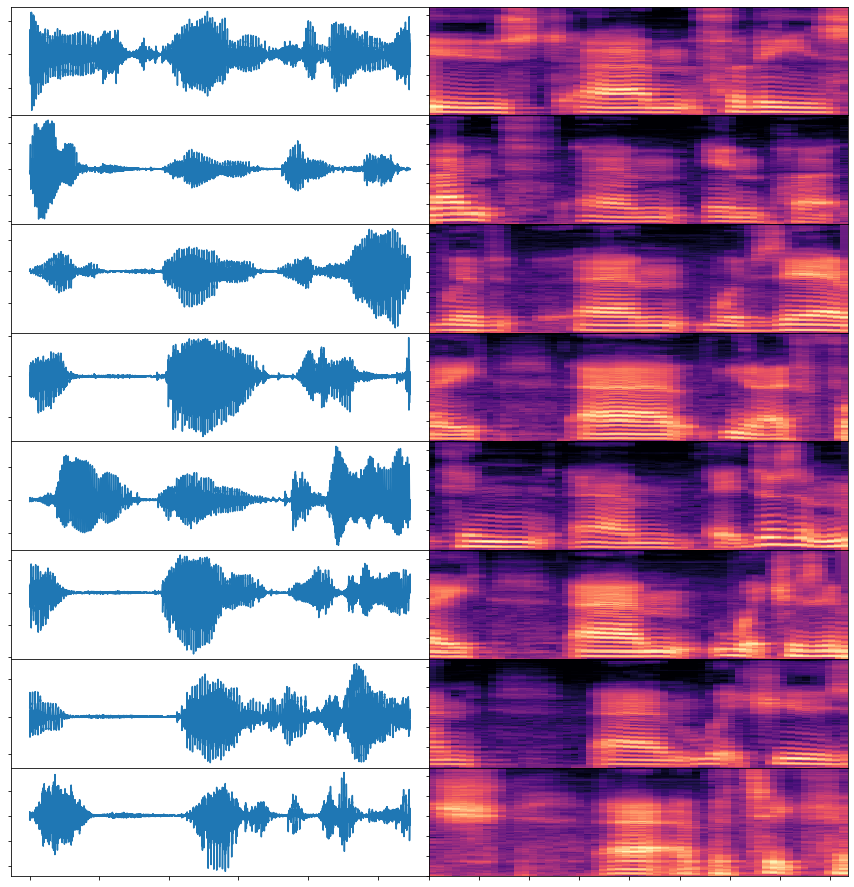

In [6]:
data = u.filler_audio(fillers, padding=0.5)
gs = gridspec.GridSpec(len(data), 2, wspace=0.0, hspace=0.0) 
plt.figure(figsize=(15, 2*(len(data))))
for i in range(len(data)):
    y, sr = data[i]
    ax = plt.subplot(gs[i,0])
    ax.plot(y)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax = plt.subplot(gs[i,1])
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    db_spec = librosa.power_to_db(spec, ref=np.max,)
    librosa.display.specshow(db_spec, y_axis='mel', x_axis='s', sr=sr, ax=ax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    IPython.display.display(IPython.display.Audio(data=y, rate=sr))

In [7]:
u.new_video("../example_data/test_deuhm.mp4", fillers)